In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import torch
import torch.optim as optim
import torchvision

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [43]:
def matrix_factorize(I,r,device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")):
    I = I.to(device)

    # Initialize the W and H matricies
    W = torch.randn(I.shape[0],r,device=device ,requires_grad=True)
    H = torch.randn(r,I.shape[1], device=device ,requires_grad=True)

    # Using gradient descent on W and H
    optimizer = optim.Adam([W, H], lr=0.01)
    mask = ~torch.isnan(I)

    threshold = 0.000001
    loss0 = np.inf
    loss1 = 0
    count = 0

    while abs(loss0 - loss1) > threshold:
        diff_matrix = torch.mm(W,H) - I
        diff_vec = diff_matrix[mask]
        loss = torch.norm(diff_vec)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss0,loss1 = loss1,loss
        if count % 500 == 0:
            print(count,"loss:",loss)
        count+=1

#     for i in range(1500):
#         # Compute the loss
#         diff_matrix = torch.mm(W, H) - I
#         diff_vector = diff_matrix[mask]
#         loss = torch.norm(diff_vector)
        
#         # Zero the gradients
#         optimizer.zero_grad()
        
#         # Backpropagate
#         loss.backward()
        
#         # Update the parameters
#         optimizer.step()

#         if i % 100 == 0:
#             print(i,"loss:",loss)
    
    
    return W,H,loss


In [6]:
# Load image
img_address = '/kaggle/input/dog-image/dog.jpg'
img = torchvision.io.read_image(img_address)
print(img.shape)

torch.Size([3, 1365, 2048])


In [7]:
#Normalize the image
img = (img - img.min()) / (img.max() - img.min())
print(img)

tensor([[[0.3098, 0.3137, 0.3137,  ..., 0.2941, 0.2941, 0.2980],
         [0.3098, 0.3137, 0.3137,  ..., 0.2941, 0.2941, 0.2980],
         [0.3098, 0.3137, 0.3137,  ..., 0.2941, 0.2941, 0.2980],
         ...,
         [0.4745, 0.4745, 0.4784,  ..., 0.3804, 0.3765, 0.3765],
         [0.4745, 0.4745, 0.4784,  ..., 0.3804, 0.3804, 0.3765],
         [0.4745, 0.4745, 0.4784,  ..., 0.3843, 0.3804, 0.3804]],

        [[0.2039, 0.2078, 0.2078,  ..., 0.2157, 0.2157, 0.2118],
         [0.2039, 0.2078, 0.2078,  ..., 0.2157, 0.2157, 0.2118],
         [0.2039, 0.2078, 0.2078,  ..., 0.2157, 0.2157, 0.2118],
         ...,
         [0.4039, 0.4039, 0.4078,  ..., 0.3216, 0.3176, 0.3176],
         [0.4039, 0.4039, 0.4078,  ..., 0.3216, 0.3216, 0.3176],
         [0.4039, 0.4039, 0.4078,  ..., 0.3255, 0.3216, 0.3216]],

        [[0.1373, 0.1412, 0.1412,  ..., 0.1176, 0.1176, 0.1176],
         [0.1373, 0.1412, 0.1412,  ..., 0.1176, 0.1176, 0.1176],
         [0.1373, 0.1412, 0.1412,  ..., 0.1176, 0.1176, 0.

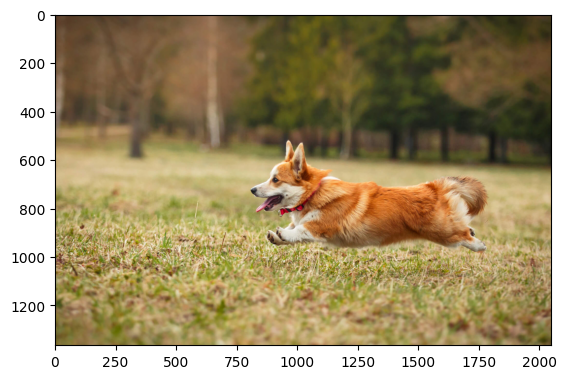

In [8]:
plt.imshow(img.permute(1,2,0))

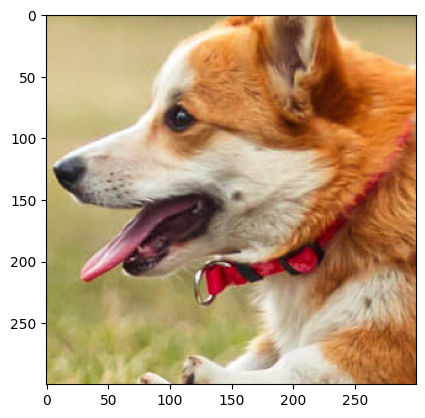

In [9]:
img = torchvision.transforms.functional.crop(img.cpu(), 600, 800, 300, 300)
plt.imshow(img.permute(1,2,0))

In [10]:
print(img.shape)

torch.Size([3, 300, 300])


In [11]:
#Convert image to gray scale
img_gray=img.mean(dim=0,keepdim=False,dtype=torch.float)
print(img.shape)

torch.Size([3, 300, 300])


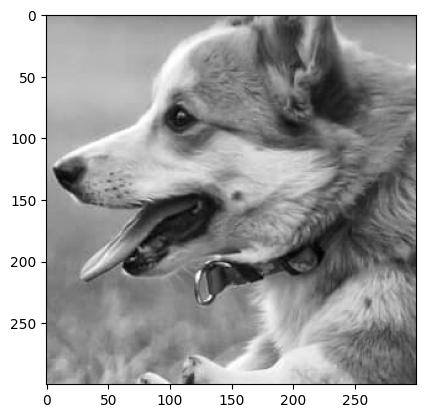

In [12]:
plt.imshow(img_gray, cmap='gray')

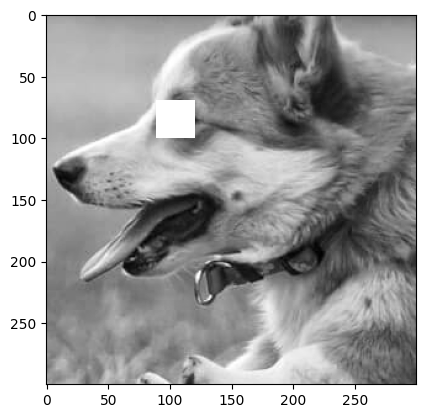

In [13]:
# Select any 30x30 part of image and convert it to nan
img_crop = img_gray.clone()
img_crop[70:100,90:120] = float('nan')
plt.imshow(img_crop, cmap='gray')

MATRIX FACTORIZATION

In [44]:
# Image reconstruction using matrix factorization
W, H, loss = matrix_factorize(img_crop, 50)

0 loss: tensor(2114.0068, grad_fn=<LinalgVectorNormBackward0>)
500 loss: tensor(15.3453, grad_fn=<LinalgVectorNormBackward0>)
1000 loss: tensor(11.8916, grad_fn=<LinalgVectorNormBackward0>)
1500 loss: tensor(10.5317, grad_fn=<LinalgVectorNormBackward0>)
2000 loss: tensor(9.7267, grad_fn=<LinalgVectorNormBackward0>)
2500 loss: tensor(9.1116, grad_fn=<LinalgVectorNormBackward0>)
3000 loss: tensor(8.6325, grad_fn=<LinalgVectorNormBackward0>)
3500 loss: tensor(8.2540, grad_fn=<LinalgVectorNormBackward0>)
4000 loss: tensor(7.9760, grad_fn=<LinalgVectorNormBackward0>)
4500 loss: tensor(7.6966, grad_fn=<LinalgVectorNormBackward0>)
5000 loss: tensor(7.4773, grad_fn=<LinalgVectorNormBackward0>)
5500 loss: tensor(7.2494, grad_fn=<LinalgVectorNormBackward0>)
6000 loss: tensor(7.0794, grad_fn=<LinalgVectorNormBackward0>)
6500 loss: tensor(6.9251, grad_fn=<LinalgVectorNormBackward0>)
7000 loss: tensor(6.8293, grad_fn=<LinalgVectorNormBackward0>)
7500 loss: tensor(6.6755, grad_fn=<LinalgVectorNormBa

In [45]:
print(loss)

tensor(6.4106, grad_fn=<LinalgVectorNormBackward0>)


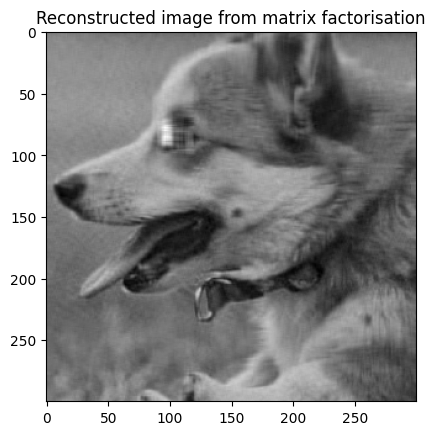

In [46]:
img_factorisation = torch.mm(W, H).cpu().detach().numpy()
plt.title("Reconstructed image from matrix factorisation")
plt.imshow(img_factorisation, cmap='gray')

max pixel value: 1.27547 and min pixel value: 0.0121249305


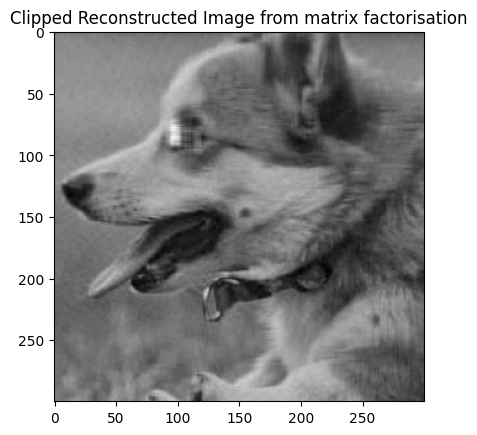

In [47]:
print("max pixel value:",img_factorisation.max(),"and min pixel value:",img_factorisation.min())

#Clipped Image
img_factorisation_clipped = np.clip(img_factorisation, 0, 255)
plt.title("Clipped Reconstructed Image from matrix factorisation")
plt.imshow(img_factorisation_clipped, cmap='gray')
plt.show()

RANDOM FOURIER FEATURES

In [18]:
def create_coordinate_map(img):

    height, width = img.shape

    w_coords = torch.arange(width).repeat(height, 1)          #shape = height x width
    h_coords = torch.arange(height).repeat(width, 1).t()      #shape = height x width
    w_coords = w_coords.reshape(-1)                           # flattening: shape = (height x width),
    h_coords = h_coords.reshape(-1)

    # Combine the x and y coordinates into a single tensor
    X = torch.stack([h_coords, w_coords], dim=1).float()

    # Move X to GPU if available
    X = X.to(device)

    # Reshape the image to (h * w, 1)
    Y = img.reshape(-1, 1).float()
    return X, Y

In [19]:
def train(model, lr, X, Y, epochs, verbose=True):
    """
    model: torch.nn.Module
    lr: learning rate(float)
    X: torch.Tensor of shape (num_samples,num_of_features)
    Y: torch.Tensor of shape (num_samples, 1)
    """

    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, Y)
        loss.backward()
        optimizer.step()
        if verbose and epoch % 10 == 0:
            print(f"Epoch {epoch} loss: {loss.item():.6f}")
    return loss.item()

In [20]:
# create RFF features
def create_rff_features(X, num_features, sigma):
    from sklearn.kernel_approximation import RBFSampler
    rff = RBFSampler(n_components=num_features, gamma=1/(2 * sigma**2))
    X = X.cpu().numpy()
    X = rff.fit_transform(X)
    return torch.tensor(X, dtype=torch.float32).to(device)

In [21]:
coordinates,intensity = create_coordinate_map(img_crop)

In [22]:
print(coordinates.shape)
print(coordinates)

torch.Size([90000, 2])
tensor([[  0.,   0.],
        [  0.,   1.],
        [  0.,   2.],
        ...,
        [299., 297.],
        [299., 298.],
        [299., 299.]])


In [23]:
print(intensity.shape)
print(intensity)

torch.Size([90000, 1])
tensor([[0.6458],
        [0.6458],
        [0.6458],
        ...,
        [0.3477],
        [0.2967],
        [0.2889]])


In [24]:
torch.isnan(intensity).any()

tensor(True)

In [25]:
X_rff = create_rff_features(coordinates, 37500, 0.008)

In [26]:
X_rff.shape

torch.Size([90000, 37500])

To pass to the model, we need to remove the rows which have nan intensity and the corresponding rows in X_rff matrix

In [27]:
mask = ~torch.isnan(intensity)
# print(mask)
print(mask.shape)
valid_indices = torch.where(mask)[0]
# print(valid_indices)
print(valid_indices.shape)

torch.Size([90000, 1])
torch.Size([89100])


In [28]:
filtered_intensity = intensity[mask].reshape(-1, 1)
filtered_X_rff = X_rff[valid_indices]
print("New shape of X_rff:",filtered_X_rff.shape)
print("New shape of intensity:",filtered_intensity.shape)
torch.isnan(filtered_intensity).any()

New shape of X_rff: torch.Size([89100, 37500])
New shape of intensity: torch.Size([89100, 1])


tensor(False)

In [29]:
in_features = 37500
out_features = 1
model = torch.nn.Linear(in_features, out_features)
model.to(device)

train(model, 0.005, filtered_X_rff, filtered_intensity, 2500)

Epoch 0 loss: 0.351884
Epoch 10 loss: 0.296639
Epoch 20 loss: 0.247845
Epoch 30 loss: 0.205492
Epoch 40 loss: 0.169449
Epoch 50 loss: 0.139319
Epoch 60 loss: 0.114538
Epoch 70 loss: 0.094470
Epoch 80 loss: 0.078464
Epoch 90 loss: 0.065894
Epoch 100 loss: 0.056177
Epoch 110 loss: 0.048782
Epoch 120 loss: 0.043245
Epoch 130 loss: 0.039164
Epoch 140 loss: 0.036201
Epoch 150 loss: 0.034080
Epoch 160 loss: 0.032581
Epoch 170 loss: 0.031531
Epoch 180 loss: 0.030800
Epoch 190 loss: 0.030291
Epoch 200 loss: 0.029934
Epoch 210 loss: 0.029679
Epoch 220 loss: 0.029493
Epoch 230 loss: 0.029351
Epoch 240 loss: 0.029239
Epoch 250 loss: 0.029146
Epoch 260 loss: 0.029066
Epoch 270 loss: 0.028996
Epoch 280 loss: 0.028931
Epoch 290 loss: 0.028872
Epoch 300 loss: 0.028817
Epoch 310 loss: 0.028765
Epoch 320 loss: 0.028716
Epoch 330 loss: 0.028669
Epoch 340 loss: 0.028625
Epoch 350 loss: 0.028583
Epoch 360 loss: 0.028542
Epoch 370 loss: 0.028504
Epoch 380 loss: 0.028467
Epoch 390 loss: 0.028431
Epoch 400 l

0.027439376339316368

In [30]:
print(img_gray)
print(img_gray.shape)

tensor([[0.6458, 0.6458, 0.6458,  ..., 0.4627, 0.4627, 0.4588],
        [0.6497, 0.6497, 0.6497,  ..., 0.4797, 0.4797, 0.4758],
        [0.6536, 0.6536, 0.6536,  ..., 0.4993, 0.4954, 0.4954],
        ...,
        [0.6732, 0.6131, 0.5856,  ..., 0.3150, 0.3033, 0.2810],
        [0.7281, 0.6641, 0.6183,  ..., 0.3294, 0.2941, 0.2784],
        [0.7647, 0.7033, 0.6444,  ..., 0.3477, 0.2967, 0.2889]])
torch.Size([300, 300])


In [31]:
img_rff = model(X_rff)
print(img_rff)
print(img_rff.shape)

tensor([[0.6650],
        [0.6708],
        [0.6611],
        ...,
        [0.3878],
        [0.3901],
        [0.4107]], grad_fn=<AddmmBackward0>)
torch.Size([90000, 1])


In [32]:
img_rff = img_rff.reshape(img_gray.shape)
print(img_rff)
print(img_rff.shape)

tensor([[0.6650, 0.6708, 0.6611,  ..., 0.4783, 0.4687, 0.4718],
        [0.6748, 0.6686, 0.6576,  ..., 0.4730, 0.4597, 0.4601],
        [0.6326, 0.6283, 0.6257,  ..., 0.4837, 0.4573, 0.4630],
        ...,
        [0.5314, 0.5031, 0.5131,  ..., 0.3381, 0.3559, 0.3597],
        [0.5487, 0.5301, 0.5381,  ..., 0.3483, 0.3549, 0.3739],
        [0.5536, 0.5554, 0.5586,  ..., 0.3878, 0.3901, 0.4107]],
       grad_fn=<ViewBackward0>)
torch.Size([300, 300])


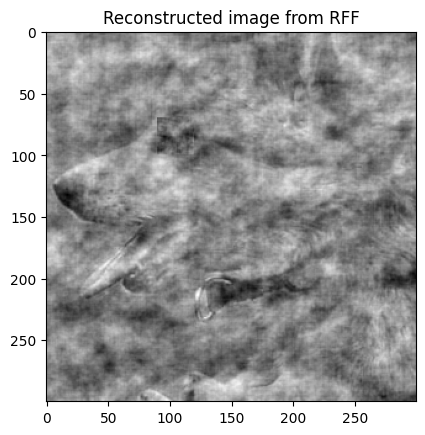

In [33]:
# img_rff = model(X_rff)
# img_rff = img_rff.reshape(img_gray.shape)
plt.title("Reconstructed image from RFF")
img_rff = img_rff.cpu().detach().numpy()
plt.imshow(img_rff,cmap='gray')
plt.show()

max pixel value: 0.87206364 and min pixel value: 0.21278557


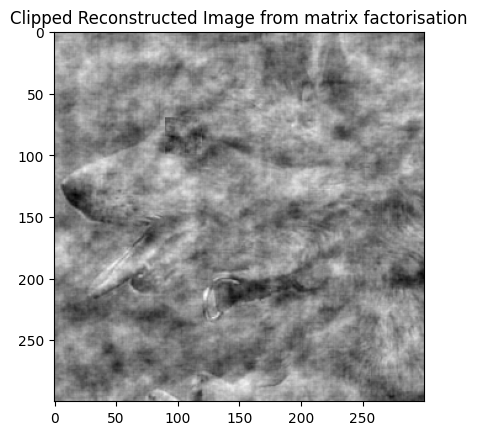

In [34]:
print("max pixel value:",img_rff.max(),"and min pixel value:",img_rff.min())

#Clipped Image
img_rff_clipped = np.clip(img_rff, 0, 255)
plt.title("Clipped Reconstructed Image from matrix factorisation")
plt.imshow(img_rff_clipped, cmap='gray')
plt.show()

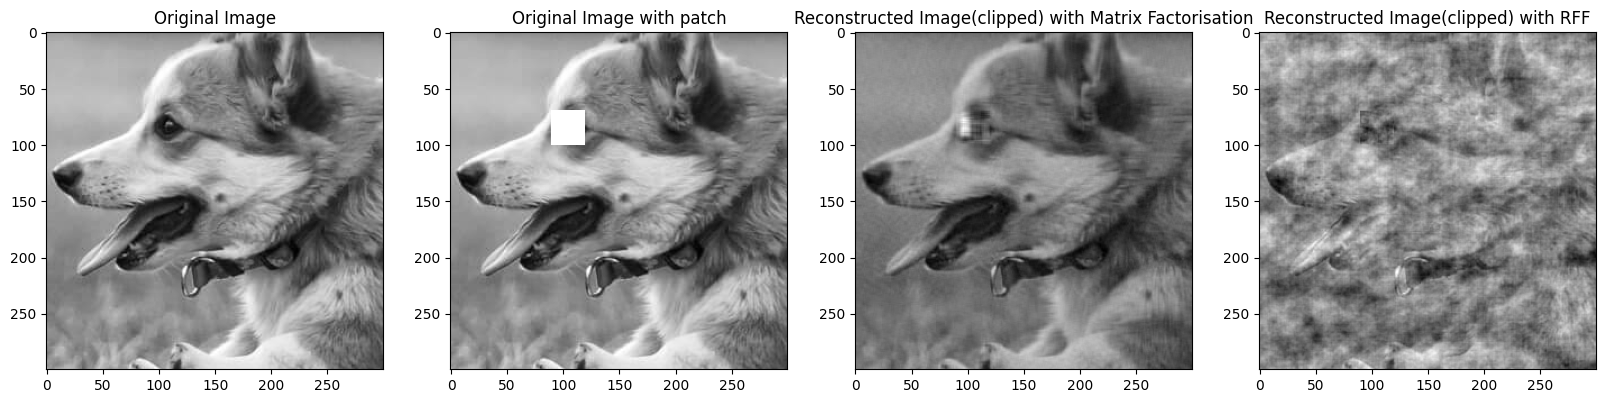

In [48]:
plt.figure(figsize=(20,8))

plt.subplot(1,4,1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Image")

plt.subplot(1,4,2)
plt.imshow(img_crop, cmap='gray')
plt.title("Original Image with patch")

plt.subplot(1,4,3)
plt.imshow(img_factorisation_clipped, cmap='gray')
plt.title("Reconstructed Image(clipped) with Matrix Factorisation")

plt.subplot(1,4,4)
plt.imshow(img_rff_clipped, cmap='gray')
plt.title("Reconstructed Image(clipped) with RFF")

plt.show()

In [36]:
def rmse(y,y_hat):
    rmse = np.sqrt(np.mean((y - y_hat) ** 2))
    return rmse

def psnr(y,y_hat):
    rmse_value = rmse(y,y_hat)
    if rmse==0:
        psnr == np.inf
    else:
        psnr = 20 * np.log10(250/rmse_value)
    return psnr

In [ ]:
img_gray = img_gray.cpu().detach().numpy()

In [51]:
## Calculate RMSE and PSNR on clipped array or standardized array with original array

print("RMSE for original image and reconstructed image(Clipped) with matrix factorisation:",rmse(img_gray,img_factorisation_clipped))
print("PSNR for original image and reconstructed image(Clipped) with matrix factorisation:",psnr(img_gray,img_factorisation_clipped))
print("RMSE for original image and reconstructed image(Clipped) with RFF:",rmse(img_gray,img_rff_clipped))
print("PSNR for original image and reconstructed image(Clipped) with RFF:",psnr(img_gray,img_rff_clipped))

RMSE for original image and reconstructed image(Clipped) with matrix factorisation: 0.040544983
PSNR for original image and reconstructed image(Clipped) with matrix factorisation: 75.8000577203294
RMSE for original image and reconstructed image(Clipped) with RFF: 0.16636446
PSNR for original image and reconstructed image(Clipped) with RFF: 63.53758901803677
